***Experiments***

In [1]:
!nvidia-smi

Sun Mar  2 17:40:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.08             Driver Version: 550.127.08     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:00:13.0 Off |                  Off |
| N/A   22C    P0             68W /  700W |       1MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
!pip install -U ultralytics wandb pandas
!yolo settings wandb=True
!wandb login 9c5174dca7a7dca0557e40da27775adbee2f0747
!wandb enabled


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/workspace/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "5aa72cb2f1054b748bca075f0fedb7c705f6121995e2647e086dd1de876d84a3",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": true,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
W&B enabled.


In [3]:
!apt-get update && apt-get -y install libgl1 unzip

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease                 
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease               
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease   
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Reading package lists... Done                                 
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1 is already the newest version (1.4.0-1).
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 127 not upgraded.


In [4]:
from ultralytics import YOLO

In [5]:
!pip uninstall -y pandas
!pip install pandas

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [13]:
!curl -L "https://app.roboflow.com/ds/EMiS4WoVvG?key=FuKZ1xrUzQ" > roboflow.zip; unzip -qo roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   3903      0 --:--:-- --:--:-- --:--:--  3913
100  174M  100  174M    0     0  78.8M      0  0:00:02  0:00:02 --:--:--  103M


In [14]:
model = YOLO("components/electronic4/weights/best.pt")
results = model.train(data="data.yaml", epochs=50, imgsz=640, project="components", name="electronic")

Ultralytics 8.3.82 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=components/electronic4/weights/best.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=components, name=electronic6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /workspace/train/labels... 5961 images, 135 backgrounds, 0 corrupt: 100%|██████████| 5961/5961 [00:06<00:00, 964.13it/s] 


train: New cache created: /workspace/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 644, len(boxes) = 8841. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning /workspace/valid/labels... 484 images, 1 backgrounds, 0 corrupt: 100%|██████████| 484/484 [00:00<00:00, 1011.71it/s]


val: New cache created: /workspace/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 57, len(boxes) = 691. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to components/electronic6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to components/electronic6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.32G      1.301     0.6402      1.311         22        640: 100%|██████████| 373/373 [00:37<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.84it/s]

                   all        484        691      0.933      0.951      0.958      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.88G      1.372      0.714      1.349         39        640: 100%|██████████| 373/373 [00:37<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

                   all        484        691      0.951      0.933      0.964      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.44G      1.425     0.7727      1.383         18        640: 100%|██████████| 373/373 [00:33<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.11it/s]

                   all        484        691      0.967      0.934      0.961      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.37G      1.432     0.7713      1.393         29        640: 100%|██████████| 373/373 [00:31<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.91it/s]

                   all        484        691      0.929      0.937      0.951      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.45G       1.43     0.7661      1.392         34        640: 100%|██████████| 373/373 [00:31<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.00it/s]

                   all        484        691      0.947      0.943      0.963      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.44G      1.421     0.7497      1.386         30        640: 100%|██████████| 373/373 [00:31<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.82it/s]

                   all        484        691      0.958       0.92      0.957      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.46G      1.395     0.7367      1.374         12        640: 100%|██████████| 373/373 [00:31<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.78it/s]

                   all        484        691      0.946      0.931      0.958      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.38G      1.383     0.7118      1.357         23        640: 100%|██████████| 373/373 [00:31<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.36it/s]

                   all        484        691      0.974       0.93      0.964       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.44G      1.364     0.7044      1.355         23        640: 100%|██████████| 373/373 [00:33<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.76it/s]

                   all        484        691       0.95      0.937      0.963      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.44G      1.344     0.6878      1.344         21        640: 100%|██████████| 373/373 [00:32<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.01it/s]

                   all        484        691      0.949       0.94      0.957      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.45G      1.348     0.6914      1.347         17        640: 100%|██████████| 373/373 [00:34<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.08it/s]

                   all        484        691      0.969      0.943      0.964       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.37G      1.328     0.6772      1.325         17        640: 100%|██████████| 373/373 [00:33<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.44it/s]

                   all        484        691      0.946      0.942      0.963      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.44G       1.33      0.665       1.33         23        640: 100%|██████████| 373/373 [00:33<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.44it/s]

                   all        484        691      0.962       0.96      0.969      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.44G      1.315     0.6679      1.332         21        640: 100%|██████████| 373/373 [00:31<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.85it/s]

                   all        484        691      0.965      0.956      0.967      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.45G      1.298     0.6437       1.31         25        640: 100%|██████████| 373/373 [00:32<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.82it/s]

                   all        484        691      0.956       0.95      0.961      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.37G      1.283     0.6414      1.302         19        640: 100%|██████████| 373/373 [00:31<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.90it/s]

                   all        484        691      0.954      0.961       0.97      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.44G      1.289     0.6406      1.305         22        640: 100%|██████████| 373/373 [00:34<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.64it/s]

                   all        484        691      0.949      0.954      0.968      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.44G      1.273     0.6343      1.305         19        640: 100%|██████████| 373/373 [00:32<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.95it/s]

                   all        484        691      0.954      0.943      0.968      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.44G      1.261     0.6079      1.292         30        640: 100%|██████████| 373/373 [00:31<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.08it/s]

                   all        484        691      0.968      0.933      0.966      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.38G      1.259     0.6143      1.288         28        640: 100%|██████████| 373/373 [00:31<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.88it/s]

                   all        484        691      0.952      0.943      0.969      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.45G       1.24     0.6004      1.276         24        640: 100%|██████████| 373/373 [00:32<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.96it/s]

                   all        484        691      0.965      0.944      0.969      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.44G      1.218     0.5936      1.266         18        640: 100%|██████████| 373/373 [00:35<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.08it/s]

                   all        484        691      0.964      0.947      0.968      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.44G       1.22     0.5883      1.265         29        640: 100%|██████████| 373/373 [00:32<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.69it/s]

                   all        484        691      0.957      0.952      0.973      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.37G      1.217     0.5884      1.263         45        640: 100%|██████████| 373/373 [00:32<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.18it/s]

                   all        484        691      0.953      0.958      0.963      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.44G      1.205     0.5823      1.257         22        640: 100%|██████████| 373/373 [00:34<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.37it/s]

                   all        484        691      0.963      0.944      0.972      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.44G       1.19     0.5578      1.248         21        640: 100%|██████████| 373/373 [00:36<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.41it/s]

                   all        484        691      0.971      0.952      0.969      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.45G      1.192     0.5663      1.254         19        640: 100%|██████████| 373/373 [00:34<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.02it/s]

                   all        484        691      0.958      0.934      0.968      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.38G      1.165     0.5512      1.235         36        640: 100%|██████████| 373/373 [00:35<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.49it/s]

                   all        484        691      0.968      0.953      0.969      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.45G      1.161     0.5465      1.237         18        640: 100%|██████████| 373/373 [00:35<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.95it/s]

                   all        484        691      0.963      0.944      0.969      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.45G      1.158     0.5494      1.224         20        640: 100%|██████████| 373/373 [00:34<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.13it/s]

                   all        484        691      0.955      0.952       0.97      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.44G      1.139     0.5377      1.213         25        640: 100%|██████████| 373/373 [00:35<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.72it/s]

                   all        484        691      0.946      0.957      0.967      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.37G      1.139     0.5318      1.221         22        640: 100%|██████████| 373/373 [00:32<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.98it/s]

                   all        484        691      0.969      0.956      0.972      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.45G      1.133     0.5305      1.217         22        640: 100%|██████████| 373/373 [00:32<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.27it/s]

                   all        484        691      0.959      0.955      0.974      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.44G      1.117     0.5242      1.214         18        640: 100%|██████████| 373/373 [00:33<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.73it/s]

                   all        484        691      0.973      0.956      0.976      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.44G       1.11     0.5129      1.201         14        640: 100%|██████████| 373/373 [00:33<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.53it/s]

                   all        484        691      0.964      0.948      0.975      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.37G       1.09     0.5074      1.189         21        640: 100%|██████████| 373/373 [00:33<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.88it/s]

                   all        484        691       0.95      0.949      0.973      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.45G       1.09     0.5016      1.191         37        640: 100%|██████████| 373/373 [00:33<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.22it/s]

                   all        484        691      0.955      0.957      0.974      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.45G      1.077     0.4949      1.175         21        640: 100%|██████████| 373/373 [00:32<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.52it/s]

                   all        484        691      0.963      0.952      0.975      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.44G      1.069     0.4976      1.176         33        640: 100%|██████████| 373/373 [00:32<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.92it/s]

                   all        484        691      0.958      0.962      0.975      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.37G      1.055     0.4883      1.178         26        640: 100%|██████████| 373/373 [00:34<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.27it/s]

                   all        484        691      0.971       0.96      0.975      0.636


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.45G      1.022     0.4296       1.19         25        640: 100%|██████████| 373/373 [00:34<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.83it/s]

                   all        484        691      0.964      0.954      0.974      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.44G      1.017     0.4295      1.182         19        640: 100%|██████████| 373/373 [00:33<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.30it/s]

                   all        484        691      0.947      0.962      0.974       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.44G     0.9949     0.4199      1.172         14        640: 100%|██████████| 373/373 [00:32<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

                   all        484        691      0.968      0.942      0.974      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.37G     0.9844      0.413      1.157         15        640: 100%|██████████| 373/373 [00:33<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

                   all        484        691      0.958      0.957      0.973      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.45G     0.9735     0.4099      1.155          8        640: 100%|██████████| 373/373 [00:32<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.00it/s]

                   all        484        691      0.963      0.956      0.976      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.45G     0.9597     0.4059      1.148         14        640: 100%|██████████| 373/373 [00:34<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.64it/s]

                   all        484        691      0.973      0.946      0.973      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.44G     0.9561     0.4025      1.148         12        640: 100%|██████████| 373/373 [00:32<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.87it/s]

                   all        484        691      0.971      0.948      0.975      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.38G     0.9382     0.3955      1.138         22        640: 100%|██████████| 373/373 [00:34<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.47it/s]


                   all        484        691      0.973      0.949      0.976      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.46G     0.9339     0.3943      1.133          9        640: 100%|██████████| 373/373 [00:33<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 15.05it/s]

                   all        484        691      0.972      0.942      0.975      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.45G      0.928      0.386      1.134         10        640: 100%|██████████| 373/373 [00:32<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.11it/s]

                   all        484        691      0.975      0.946      0.974      0.638



50 epochs completed in 0.493 hours.
Optimizer stripped from components/electronic6/weights/last.pt, 40.5MB
Optimizer stripped from components/electronic6/weights/best.pt, 40.5MB

Validating components/electronic6/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.73it/s]


                   all        484        691      0.973      0.949      0.976      0.643
                    IC         31         31      0.943      0.968       0.97      0.625
                   LED         96        117      0.973      0.941      0.983      0.642
             capacitor         52         55      0.974          1      0.985      0.657
     ceramic capacitor         29         30          1      0.924       0.99      0.566
              resistor        282        391      0.958      0.875      0.932      0.629
     voltage regulator         67         67       0.99      0.985      0.995      0.739
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to components/electronic6


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▃▄▄▁▄▃▅▄▃▅▆▅▄▆▆▅▆▆▆▇▇▆▆▆▆▇▇██▇██▇▇▇█▇███
metrics/mAP50-95(B),▄▂▂▁▃▃▄▄▂▄▅▅▆▅▅▅▆▆▆▆▆▇▇▇▇▇█▇▇██▇▇▇▇█████
metrics/precision(B),▂▄▇▁▆█▄▄▇▄▇▅▅▄▅▅▇▇▅▅█▆▇▆▅▇▆█▆▄▆▅█▇▄▆▆███
metrics/recall(B),▆▂▂▃▄▁▁▃▃▄▇▇▅█▆▂▄▅▆▇▆▂▆▄▆▇▇▅▅▇█▇▆█▄▇▅▅▅▅
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▁▁▁▁


In [8]:
rm -r test train valid data.yaml


0: 640x640 1 resistor, 9.6ms
Speed: 5.6ms preprocess, 9.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


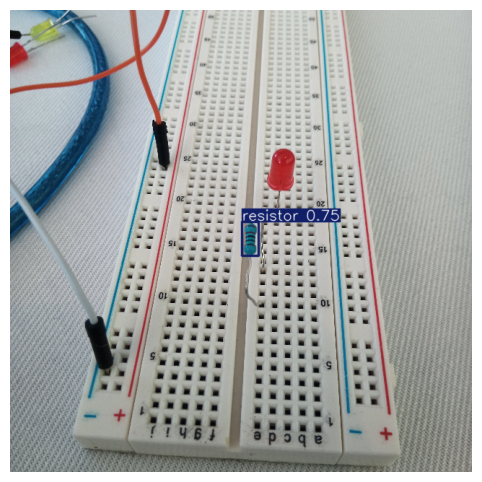

In [10]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

import cv2
image = cv2.imread("led.jpg")
image = cv2.resize(image, (640, 640))  # Resize to match training size


results = model(image)
for result in results:
    # Plot the annotated image
    img_annotated = result.plot()  # Automatically draws bounding boxes and labels

    # Convert BGR (OpenCV) to RGB (Matplotlib)
    img_annotated = cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_annotated)
    plt.axis("off")
    plt.show()